In [1]:
import pandas as pd

In [2]:
results_person_df = pd.read_csv('数据/results_person_df.csv')
results_family_df = pd.read_csv('数据/results_family_df.csv')


In [3]:
results_person_noncluster_df = pd.read_csv('数据/results_person_noncluster_df.csv')
results_family_noncluster_df = pd.read_csv('数据/results_family_noncluster_df.csv')


In [4]:
results_person_nongragh_df = pd.read_csv('数据/results_person_nongragh_df.csv')
results_family_nongragh_df = pd.read_csv('数据/results_family_nongragh_df.csv')
raw_person_df = pd.read_csv('数据/raw_person_df.csv')
raw_family_df = pd.read_csv('数据/raw_family_df.csv')

# 家庭的

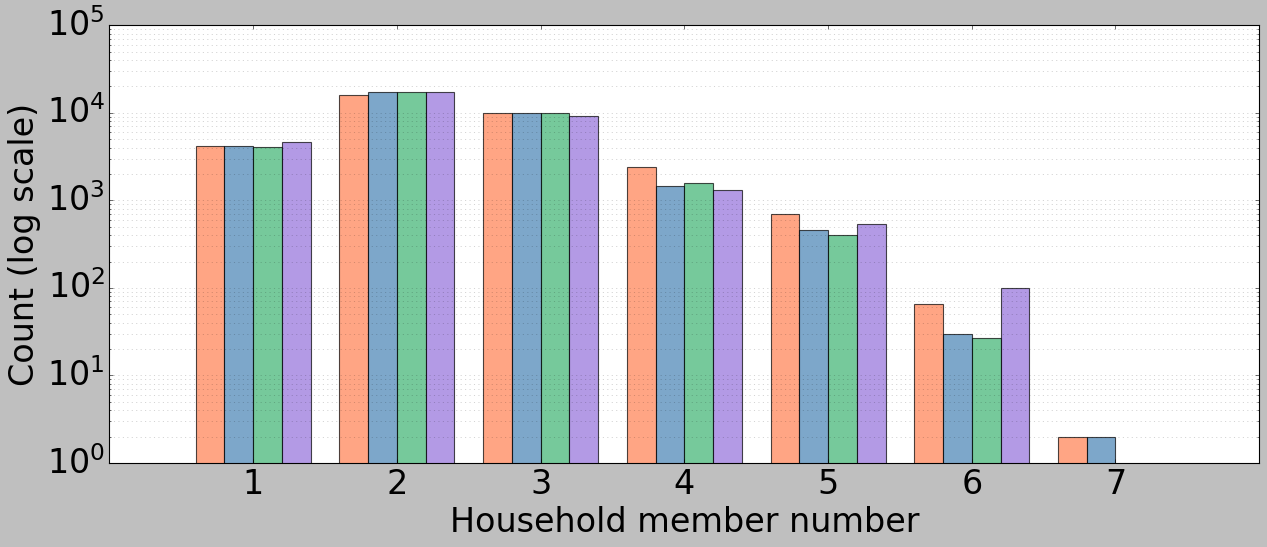

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(plt.style.available[5])
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_家庭成员数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()
noncluster_mean = results_family_noncluster_df['family_家庭成员数量'].mean()
nongraph_mean = results_family_nongragh_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household member number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭成员数量分布对比.png', dpi=300)
plt.show()

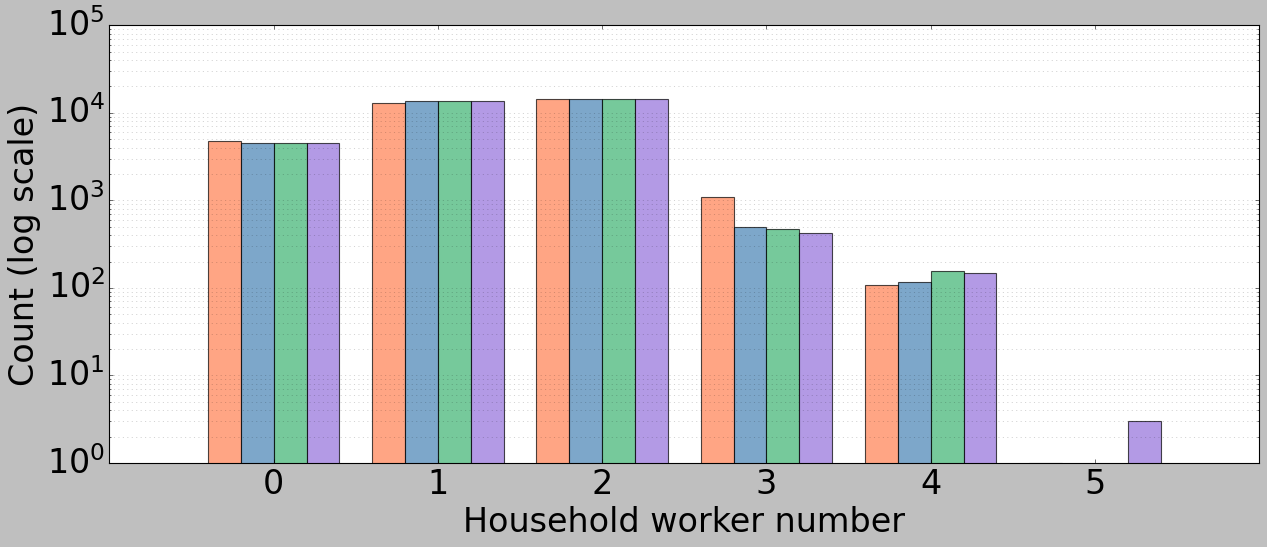

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_家庭工作人口数'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()
noncluster_mean = results_family_noncluster_df['family_家庭工作人口数'].mean()
nongraph_mean = results_family_nongragh_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household worker number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭工作成员数量分布对比.png', dpi=300)
plt.show()

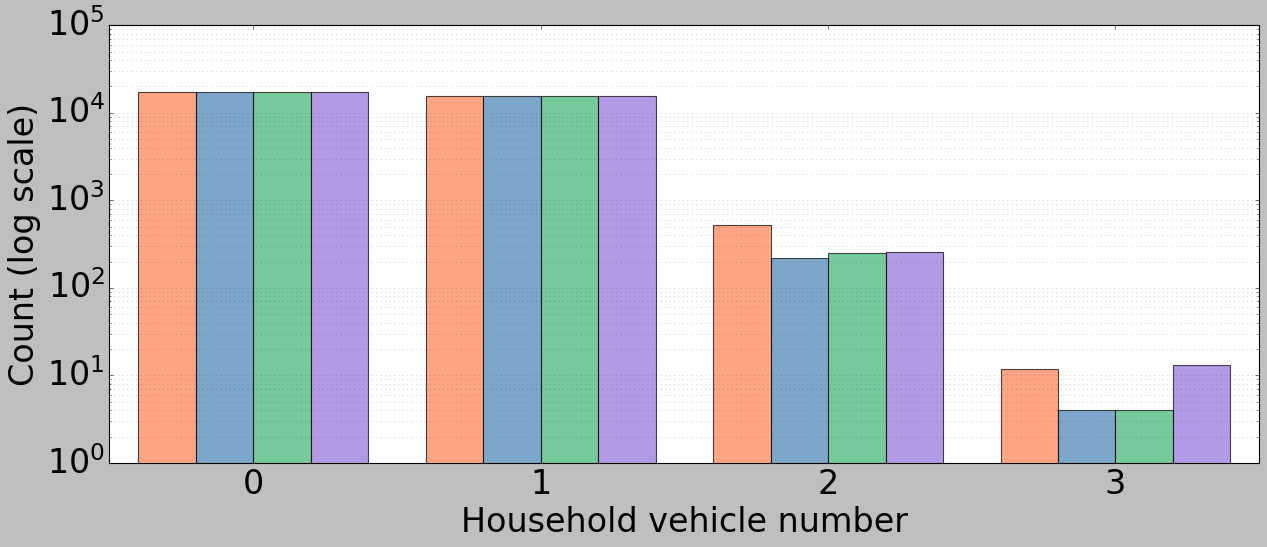

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_机动车数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()
noncluster_mean = results_family_noncluster_df['family_机动车数量'].mean()
nongraph_mean = results_family_nongragh_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household vehicle number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭车辆数量分布对比.png', dpi=300)
plt.show()

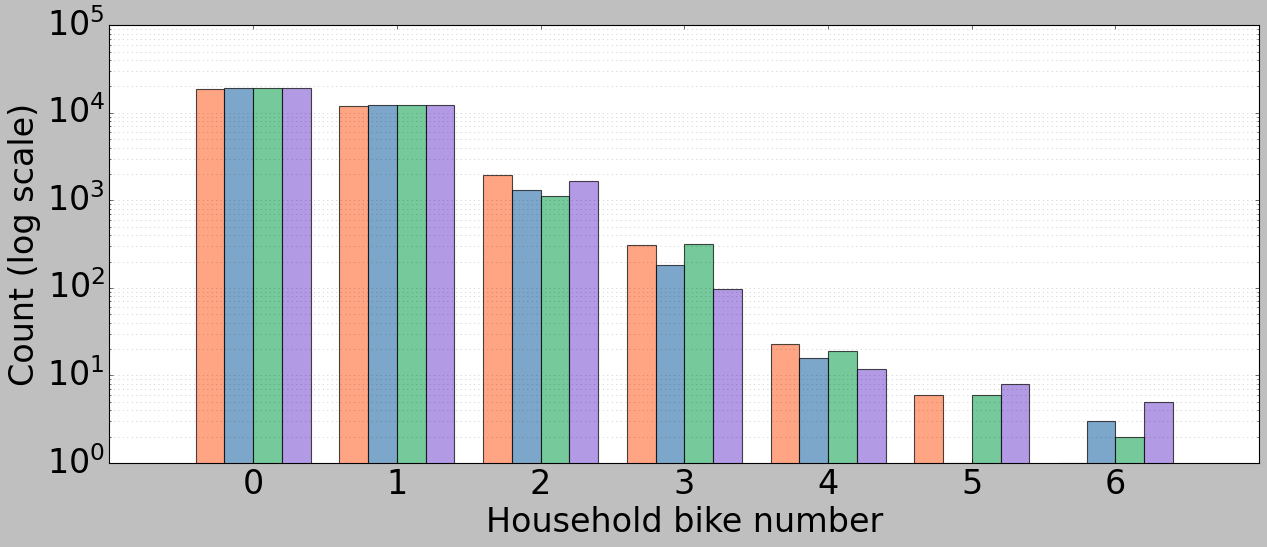

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_脚踏自行车数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()
noncluster_mean = results_family_noncluster_df['family_脚踏自行车数量'].mean()
nongraph_mean = results_family_nongragh_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household bike number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭自行车数量分布对比.png', dpi=300)
plt.show()

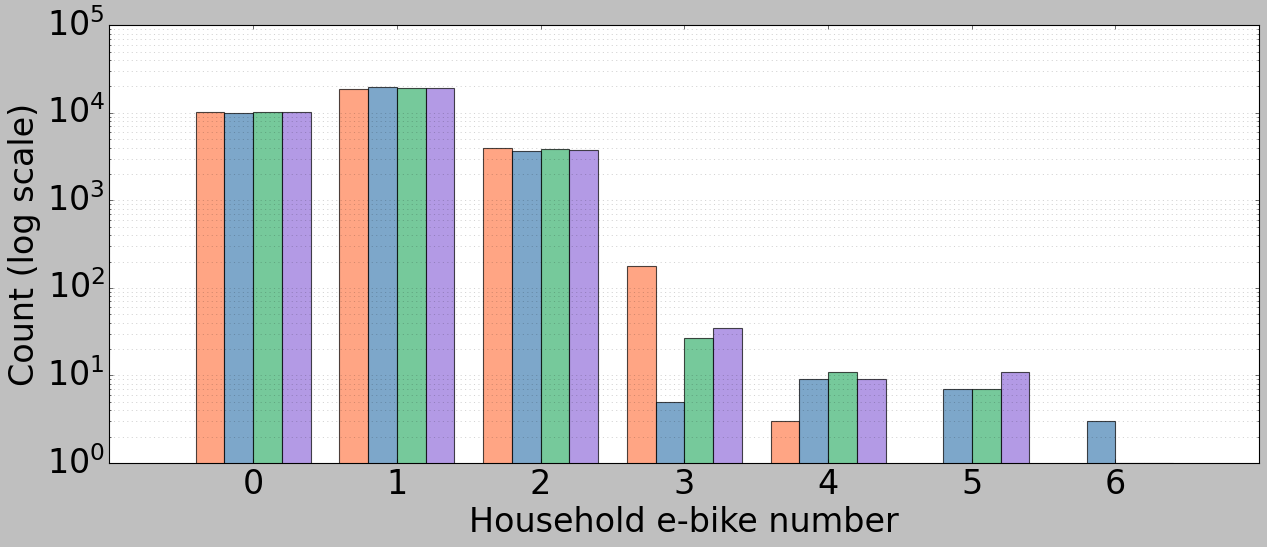

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_电动自行车数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()
noncluster_mean = results_family_noncluster_df['family_电动自行车数量'].mean()
nongraph_mean = results_family_nongragh_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household e-bike number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭电动车数量分布对比.png', dpi=300)
plt.show()

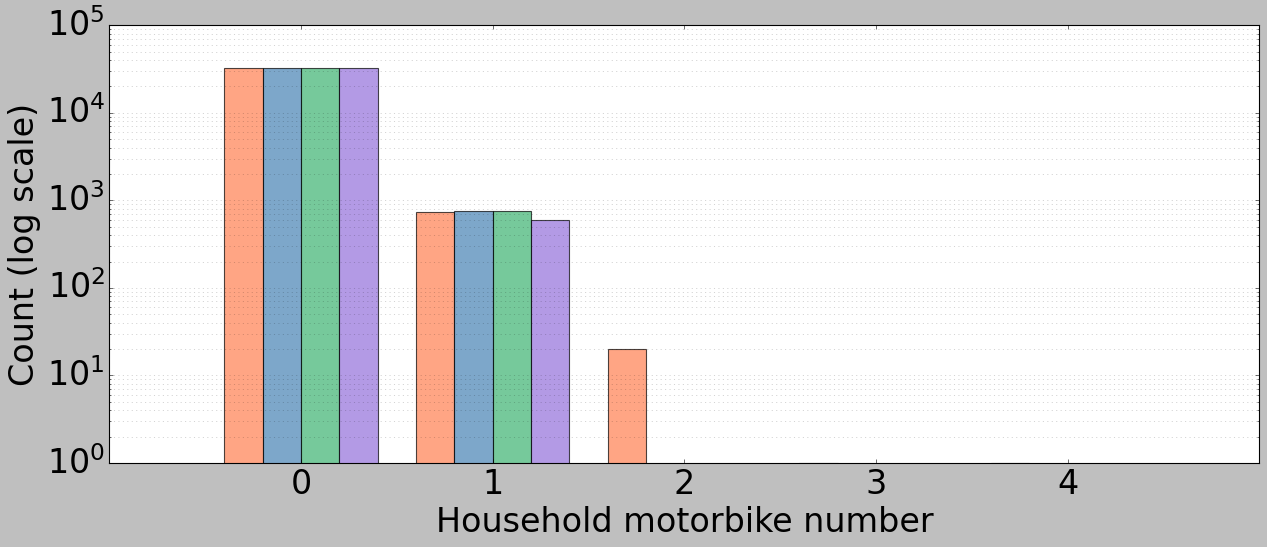

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_摩托车数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()
noncluster_mean = results_family_noncluster_df['family_摩托车数量'].mean()
nongraph_mean = results_family_nongragh_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household motorbike number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭摩托车数量分布对比.png', dpi=300)
plt.show()

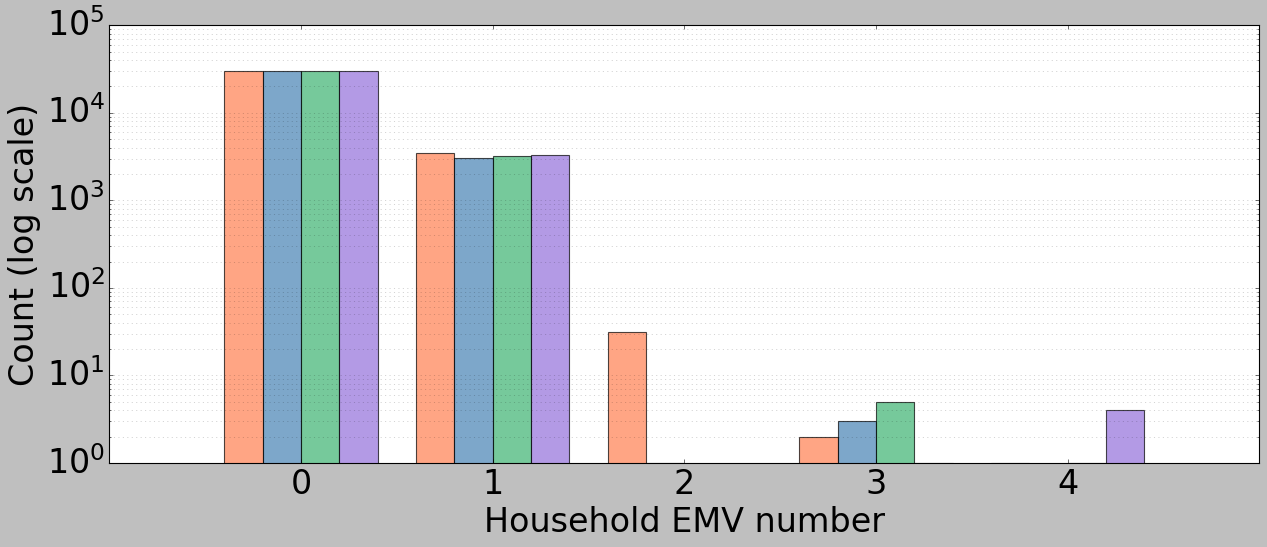

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_老年代步车数量'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()
noncluster_mean = results_family_noncluster_df['family_老年代步车数量'].mean()
nongraph_mean = results_family_nongragh_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household EMV number', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭代步车数量分布对比.png', dpi=300)
plt.show()

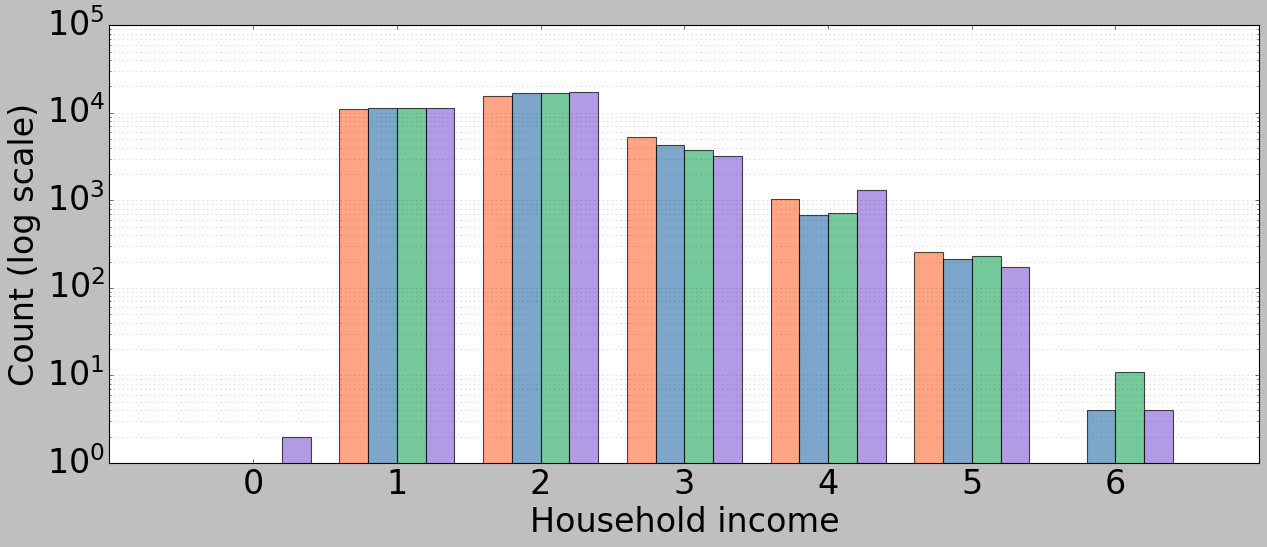

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['family_家庭年收入'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()
noncluster_mean = results_family_noncluster_df['family_家庭年收入'].mean()
nongraph_mean = results_family_nongragh_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子


plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Household income', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭收入分布对比.png', dpi=300)
plt.show()

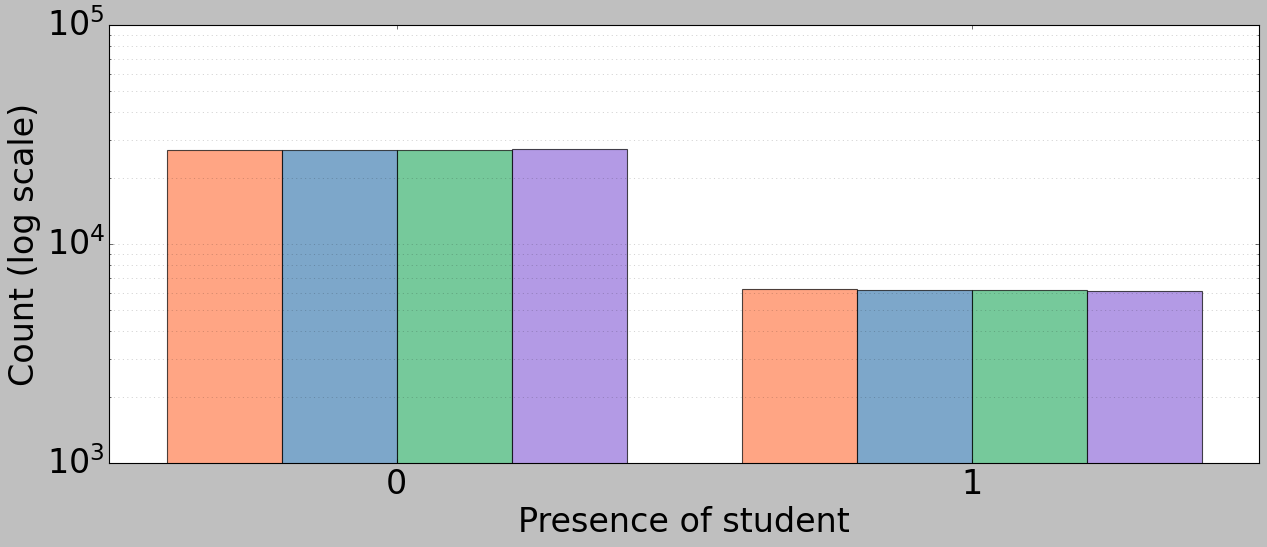

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()
noncluster_age_counts = results_family_noncluster_df['have_student'].value_counts().sort_index()
nongraph_age_counts = results_family_nongragh_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()
noncluster_mean = results_family_noncluster_df['have_student'].mean()
nongraph_mean = results_family_nongragh_df['have_student'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Presence of student', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-家庭学生分布对比.png', dpi=300)
plt.show()

# 个人的

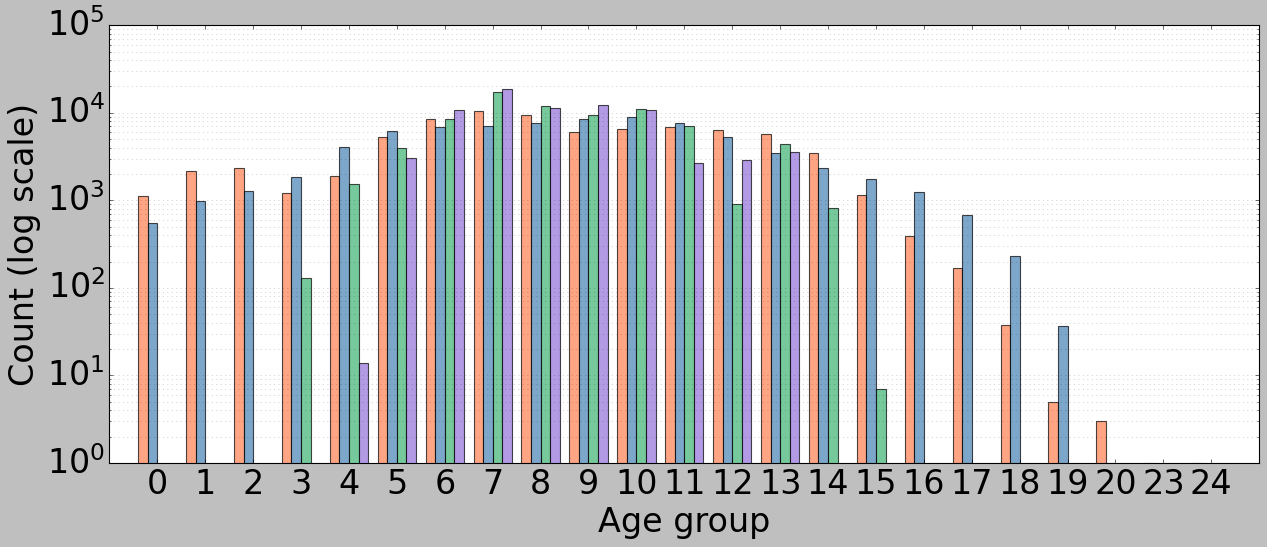

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['age'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()
noncluster_mean = results_person_noncluster_df['age'].mean()
nongraph_mean = results_person_nongragh_df['age'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Age group', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

plt.xlim(-1, len(all_ages))  # 确保x轴范围覆盖所有柱子
# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人年龄分布对比.png', dpi=300)
plt.show()

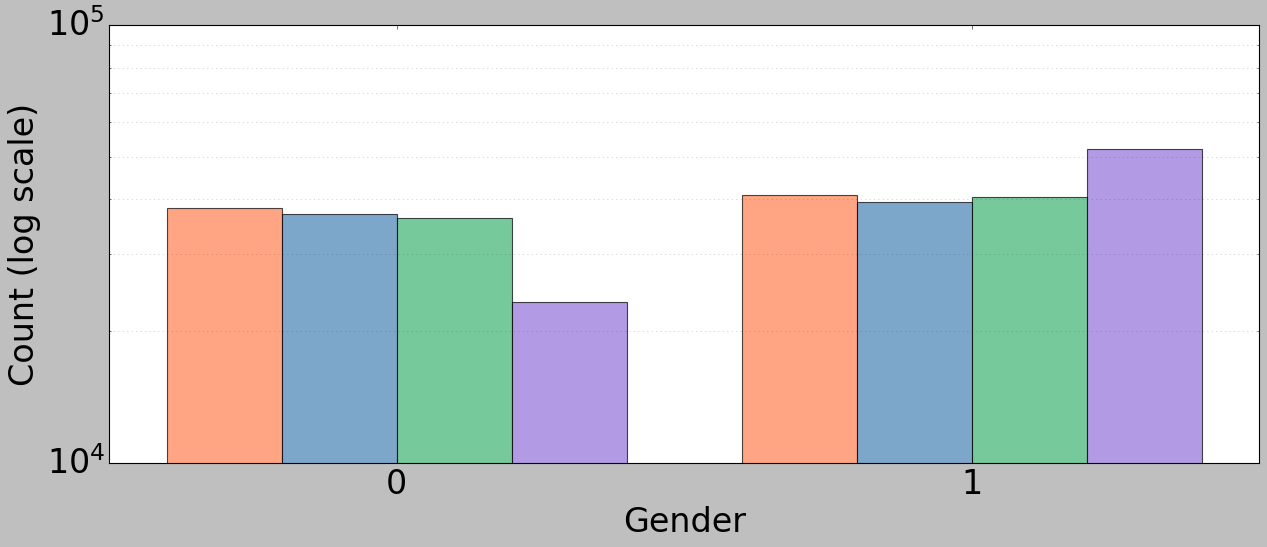

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['gender'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()
noncluster_mean = results_person_noncluster_df['gender'].mean()
nongraph_mean = results_person_nongragh_df['gender'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Gender', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人性别分布对比.png', dpi=300)
plt.show()

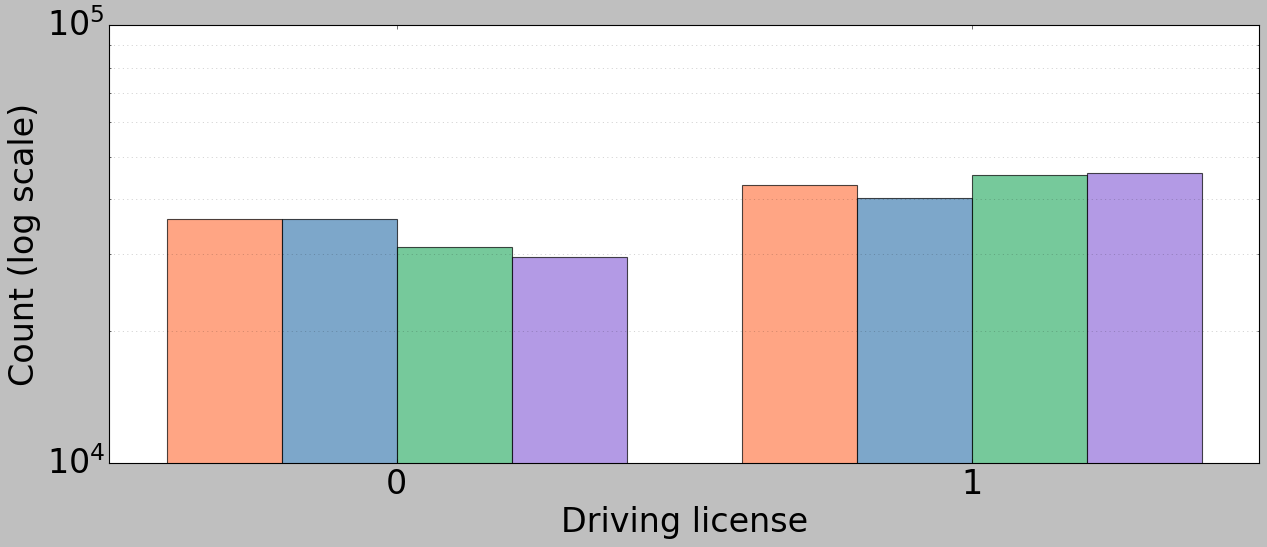

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['license'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()
noncluster_mean = results_person_noncluster_df['license'].mean()
nongraph_mean = results_person_nongragh_df['license'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Driving license', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人驾照分布对比.png', dpi=300)
plt.show()

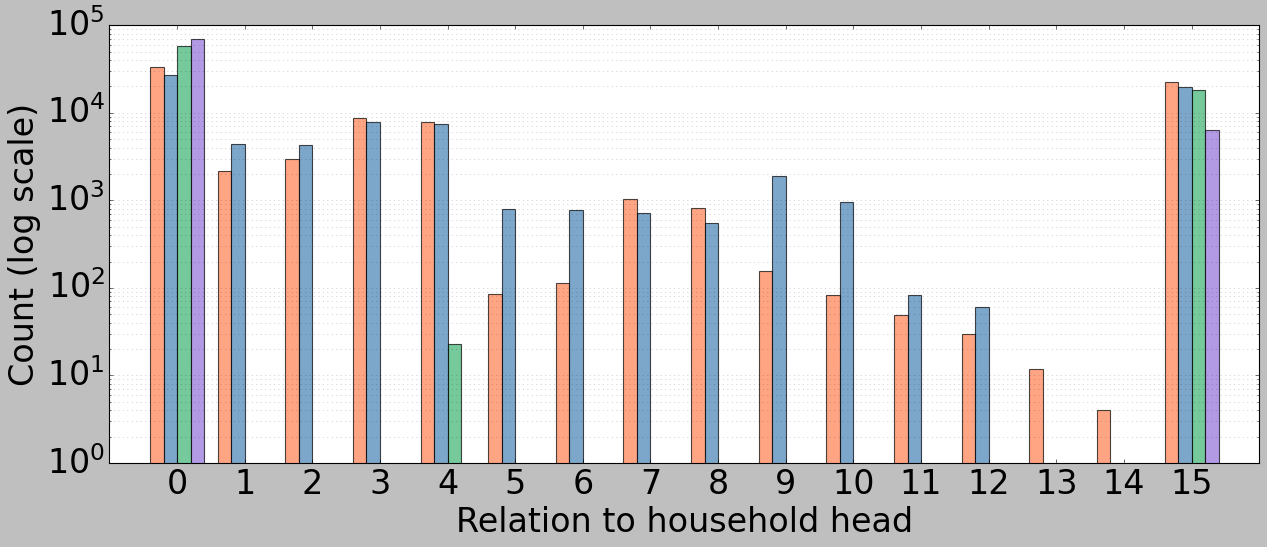

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['relation'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()
noncluster_mean = results_person_noncluster_df['relation'].mean()
nongraph_mean = results_person_nongragh_df['relation'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Relation to household head', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)


plt.xlim(-1, len(all_ages))  # 确保x轴范围覆盖所有柱子

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人关系分布对比.png', dpi=300)
plt.show()

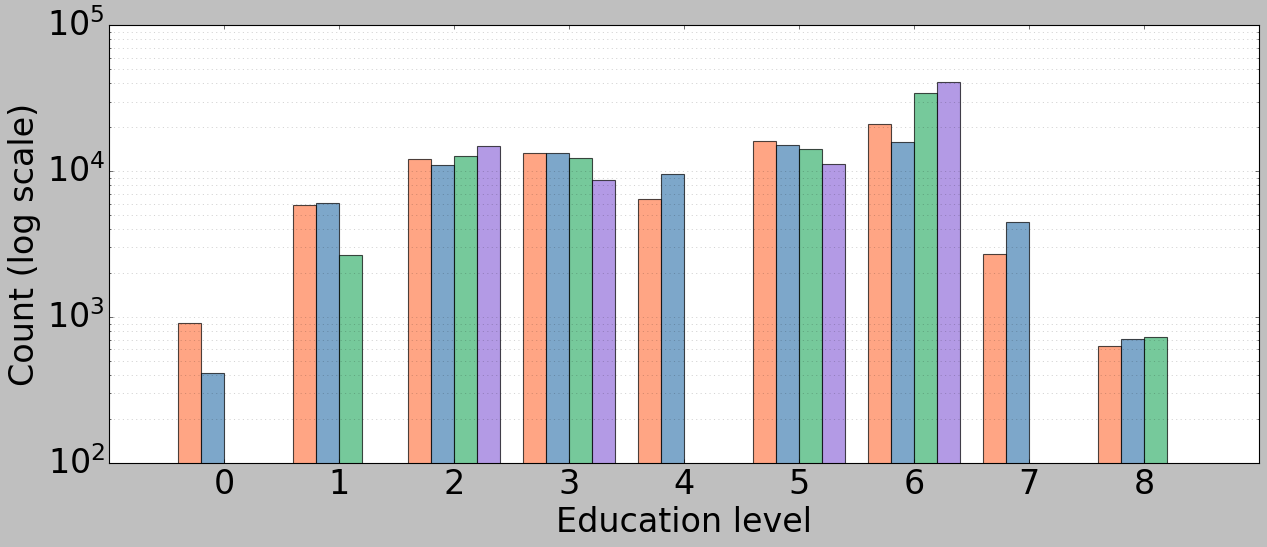

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['education'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()
noncluster_mean = results_person_noncluster_df['education'].mean()
nongraph_mean = results_person_nongragh_df['education'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Education level', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)


plt.xlim(-1, len(all_ages))  # 确保x轴范围覆盖所有柱子

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人教育分布对比.png', dpi=300)
plt.show()

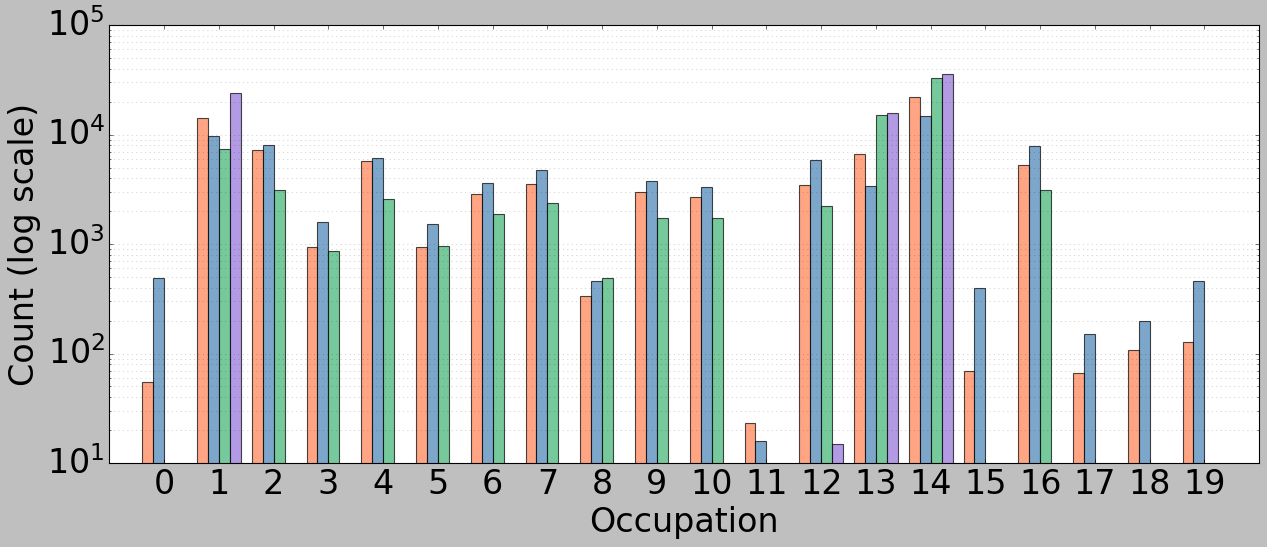

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取四个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()
noncluster_age_counts = results_person_noncluster_df['occupation'].value_counts().sort_index()
nongraph_age_counts = results_person_nongragh_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()
noncluster_mean = results_person_noncluster_df['occupation'].mean()
nongraph_mean = results_person_nongragh_df['occupation'].mean()

# 创建一个合并的索引，确保包括所有数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | 
                  set(results_age_counts.index) | 
                  set(noncluster_age_counts.index) | 
                  set(nongraph_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]
noncluster_values = [noncluster_age_counts.get(age, 0) for age in all_ages]
nongraph_values = [nongraph_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(16, 7))
x = np.arange(len(all_ages))
width = 0.2  # 调整柱宽以容纳4个柱子

plt.bar(x - 1.5*width, raw_values, width, alpha=0.7, color='coral', label='HTS data')
plt.bar(x - 0.5*width, results_values, width, alpha=0.7, color='steelblue', label='HiDiT')
plt.bar(x + 0.5*width, nongraph_values, width, alpha=0.7, color='mediumseagreen', label='HiDiT w/o Graph')
plt.bar(x + 1.5*width, noncluster_values, width, alpha=0.7, color='mediumpurple', label='HiDiT w/o Conditioning')


# 设置y轴为对数坐标
plt.yscale('log')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Occupation', fontsize=30)
plt.ylabel('Count (log scale)', fontsize=30)
# plt.title('Family Member Number Distribution Comparison (with Ablation Studies)', fontsize=14, fontweight='bold')
# plt.legend(loc='upper right', fontsize=30)


plt.xlim(-1, len(all_ages))  # 确保x轴范围覆盖所有柱子

# 添加均值标注
text_y_positions = [0.95, 0.90, 0.85, 0.80]
# labels_means = [
#     f'Raw Mean: {raw_mean:.2f}',
#     f'Full Model Mean: {results_mean:.2f}',
#     f'w/o Cluster Mean: {noncluster_mean:.2f}',
#     f'w/o Graph Mean: {nongraph_mean:.2f}'
# ]
# colors = ['wheat', 'lightblue', 'lightgreen', 'plum']

# for i, (label, color, y_pos) in enumerate(zip(labels_means, colors, text_y_positions)):
#     plt.text(0.02, y_pos, label, 
#              transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))

plt.grid(axis='y', alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('图片/消融实验-个人职业分布对比.png', dpi=300)
plt.show()